In [18]:
import os
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.core.display import display
import datetime as dt

from sklearn.model_selection import train_test_split

data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "CreditTraining.csv")
df = pd.read_csv(data_path)

In [19]:
display(df.head())

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


In [3]:
display(df.describe(include="all"))

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
count,5380.000000,5380.000000,5380,5380,5380,5380,5380,5380,5378.000000,5380.000000,5378,5378.000000,5380,5380,5380,5380,5380.000000,1174,5380
unique,NaN,NaN,2,4382,1244,2,4,5,NaN,NaN,522,NaN,3,276,2,5,NaN,331,13
top,NaN,NaN,Non Existing Client,01/01/1982,05/12/2011,NP_Client,University,Married,NaN,NaN,36,NaN,C,06/12/2011,Sales,Owned,NaN,30/05/2013,B
freq,NaN,NaN,3369,7,39,4968,4785,4206,NaN,NaN,1807,NaN,4638,48,4119,4791,NaN,98,3176
mean,4784.535688,0.073048,NaN,NaN,NaN,NaN,NaN,NaN,1.058572,12.626022,NaN,4.266270,NaN,NaN,NaN,NaN,1.089033,NaN,NaN
std,2781.436262,0.260240,NaN,NaN,NaN,NaN,NaN,NaN,1.339001,9.972164,NaN,7.225926,NaN,NaN,NaN,NaN,0.297587,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,2368.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
50%,4762.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
75%,7180.250000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,18.000000,NaN,4.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


5380

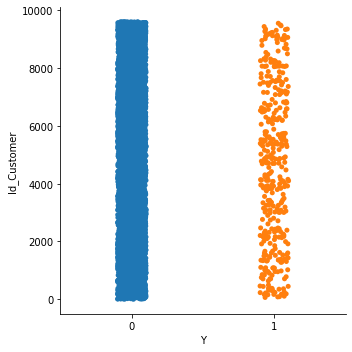

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.catplot(x="Y", y="Id_Customer", data=df);

# plt.scatter(df[df["Y"]==1]["Id_Customer"], range(df[df["Y"]==1].shape[0]),c = 'red')
# # plt.scatter(df[df["Y"]==0]["Id_Customer"], range(df[df["Y"]==0].shape[0]),c = 'blue')
# plt.show()
display(df["Id_Customer"].nunique())

In [6]:
print("Information about Y")
print("Possible values:", df.Y.unique(), end="\n\n")
print(df.Y.value_counts(), end="\n\n")

Information about Y
Possible values: [0 1]

0    4987
1     393
Name: Y, dtype: int64



In [7]:
display(df[~df["Net_Annual_Income"].isna()])

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,09/04/1976,19/10/2011,NP_Client,University,Married,2.0,1,36,1.0,G,25/11/2011,Sales,Owned,1,NaN,C
5376,1358,1,Existing Client,27/05/1982,22/06/2011,NP_Client,University,Married,3.0,15,"24,816",1.0,C,11/07/2011,Sales,Owned,1,31/10/2012,L
5377,2502,0,Non Existing Client,19/10/1950,15/08/2011,NP_Client,University,Divorced,0.0,14,"14,4",30.0,C,16/08/2011,Branch,Old rent,1,31/03/2013,B
5378,6712,0,Non Existing Client,01/08/1983,15/01/2012,NP_Client,University,Married,1.0,1,36,1.0,G,19/01/2012,Sales,Owned,1,NaN,C


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Y", axis=1), df["Y"], test_size=0.1, random_state=7)
# display(X_train)
# display(y_train)
df_train = pd.concat([y_train, X_train], axis=1).reset_index(drop=True)
df_test = pd.concat([y_test, X_test], axis=1).reset_index(drop=True)
display(df_train)
display(df_test)
print(df_train["Y"].value_counts()/df_train.shape[0])
print(df_test["Y"].value_counts()/df_test.shape[0])

In [ ]:
print(df.dtypes)
print(df["Number_Of_Dependant"].unique())
df["Number_Of_Dependant"].astype("int64")
print(df["Number_Of_Dependant"].dtype)
print(df[])

In [21]:
print(df.dtypes)
print(df["Number_Of_Dependant"].unique())
df["Number_Of_Dependant"].astype("int64")
print(df["Number_Of_Dependant"].dtype)
print(df[])

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,09/04/1976,19/10/2011,NP_Client,University,Married,2.0,1,36,1.0,G,25/11/2011,Sales,Owned,1,NaN,C
5376,1358,1,Existing Client,27/05/1982,22/06/2011,NP_Client,University,Married,3.0,15,"24,816",1.0,C,11/07/2011,Sales,Owned,1,31/10/2012,L
5377,2502,0,Non Existing Client,19/10/1950,15/08/2011,NP_Client,University,Divorced,0.0,14,"14,4",30.0,C,16/08/2011,Branch,Old rent,1,31/03/2013,B
5378,6712,0,Non Existing Client,01/08/1983,15/01/2012,NP_Client,University,Married,1.0,1,36,1.0,G,19/01/2012,Sales,Owned,1,NaN,C


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Y", axis=1), df["Y"], test_size=0.1, random_state=7)
# display(X_train)
# display(y_train)
df_train = pd.concat([y_train, X_train], axis=1).reset_index(drop=True)
df_test = pd.concat([y_test, X_test], axis=1).reset_index(drop=True)
display(df_train)
display(df_test)
print(df_train["Y"].value_counts()/df_train.shape[0])
print(df_test["Y"].value_counts()/df_test.shape[0])

,Y,Id_Customer,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,2246,Non Existing Client,17/05/1969,21/07/2011,NP_Client,University,Married,2.0,1,36,1.0,C,16/08/2011,Sales,Owned,1,NaN,B
1,0,5138,Existing Client,21/03/1976,08/05/2006,P_Client,University,Married,0.0,10,18,2.0,C,07/12/2011,Sales,Owned,1,NaN,B
2,0,1096,Non Existing Client,06/03/1964,02/06/2011,NP_Client,University,Married,3.0,10,18,1.0,C,28/06/2011,Sales,Owned,1,NaN,B
3,0,8413,Non Existing Client,27/01/1972,11/03/2012,NP_Client,University,Married,3.0,1,36,1.0,C,12/03/2012,Sales,Owned,1,NaN,D
4,0,3511,Non Existing Client,06/08/1961,26/09/2011,NP_Client,University,Married,0.0,1,36,1.0,C,27/09/2011,Sales,Owned,1,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,0,1074,Non Existing Client,22/02/1973,21/06/2011,NP_Client,University,Married,4.0,15,20,1.0,C,26/06/2011,Sales,Owned,1,NaN,B
4838,0,8514,Non Existing Client,28/11/1970,15/03/2012,NP_Client,University,Married,2.0,1,36,1.0,C,18/03/2012,Sales,Owned,1,NaN,B
4839,0,1739,Non Existing Client,10/04/1974,11/05/2006,NP_Client,University,Married,0.0,30,18,30.0,C,26/07/2011,Sales,Owned,1,NaN,B
4840,0,1128,Non Existing Client,03/09/1953,19/06/2011,NP_Client,University,Single,0.0,10,36,3.0,C,28/06/2011,Sales,Old rent,1,NaN,D


,Y,Id_Customer,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,6453,Existing Client,05/01/1964,10/01/2012,NP_Client,Master/PhD,Divorced,1.0,11,72,1.0,C,26/01/2012,Sales,Owned,1,NaN,C
1,0,7091,Existing Client,15/03/1985,03/03/2011,P_Client,University,Single,2.0,10,18,10.0,C,30/01/2012,Branch,Owned,1,NaN,G
2,0,710,Existing Client,10/02/1955,19/05/2011,NP_Client,University,Married,0.0,20,"24,828",15.0,C,28/06/2011,Sales,Owned,1,NaN,L
3,0,5627,Non Existing Client,04/06/1976,07/12/2011,NP_Client,University,Married,2.0,5,25,1.0,C,11/12/2011,Sales,Owned,1,NaN,D
4,0,1307,Existing Client,28/05/1985,08/09/2010,P_Client,University,Single,0.0,15,"21,288",1.0,C,12/07/2011,Sales,Owned,1,NaN,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0,753,Existing Client,21/11/1979,02/06/2011,NP_Client,University,Married,1.0,3,"103,752",6.0,C,08/06/2011,Sales,Old rent,1,NaN,L
534,0,7818,Existing Client,20/02/1969,31/05/2006,NP_Client,University,Married,3.0,4,200,3.0,P,13/03/2012,Branch,Owned,1,NaN,E
535,0,3149,Non Existing Client,07/09/1977,11/09/2011,NP_Client,University,Married,0.0,15,30,1.0,C,15/09/2011,Sales,Owned,1,NaN,D
536,1,4717,Existing Client,31/05/1974,24/10/2011,NP_Client,Master/PhD,Single,0.0,15,50,7.0,G,22/11/2011,Sales,Owned,1,30/09/2012,C


0    0.927922
1    0.072078
Name: Y, dtype: float64
0    0.918216
1    0.081784
Name: Y, dtype: float64


## Feature engineering

### Categorical variables

In [53]:
categorical_variables = ['Customer_Type', 'Educational_Level', 'Marital_Status',
                                     'P_Client', 'Prod_Category', 'Prod_Sub_Category',
                                     'Source', 'Type_Of_Residence']
display(df[categorical_variables])
print(df[categorical_variables].nunique(), end="\n\n")
for c in categorical_variables:
    print("{:>20s} : ".format(c), df[c].unique())

,Customer_Type,Educational_Level,Marital_Status,P_Client,Prod_Category,Prod_Sub_Category,Source,Type_Of_Residence
0,Non Existing Client,University,Married,NP_Client,B,C,Sales,Owned
1,Existing Client,University,Married,P_Client,G,C,Sales,Parents
2,Non Existing Client,University,Married,NP_Client,B,C,Sales,Owned
3,Existing Client,University,Married,NP_Client,L,C,Sales,New rent
4,Non Existing Client,University,Married,NP_Client,D,C,Sales,Owned
...,...,...,...,...,...,...,...,...
5375,Non Existing Client,University,Married,NP_Client,C,G,Sales,Owned
5376,Existing Client,University,Married,NP_Client,L,C,Sales,Owned
5377,Non Existing Client,University,Divorced,NP_Client,B,C,Branch,Old rent
5378,Non Existing Client,University,Married,NP_Client,C,G,Sales,Owned


Customer_Type         2
Educational_Level     4
Marital_Status        5
P_Client              2
Prod_Category        13
Prod_Sub_Category     3
Source                2
Type_Of_Residence     5
dtype: int64

       Customer_Type :  ['Non Existing Client' 'Existing Client']
   Educational_Level :  ['University' 'Master/PhD' 'Secondary or Less' 'Diploma']
      Marital_Status :  ['Married' 'Single' 'Widowed' 'Divorced' 'Separated']
            P_Client :  ['NP_Client' 'P_Client']
       Prod_Category :  ['B' 'G' 'L' 'D' 'C' 'E' 'K' 'M' 'H' 'J' 'A' 'F' 'I']
   Prod_Sub_Category :  ['C' 'P' 'G']
              Source :  ['Sales' 'Branch']
   Type_Of_Residence :  ['Owned' 'Parents' 'New rent' 'Old rent' 'Company']




--------


Customer_Type        Y
Existing Client      0    1861
                     1     150
Non Existing Client  0    3126
                     1     243
dtype: int64

Customer_Type        Y
Existing Client      0    92.541024
                     1     7.458976
Non Existing Client  0    92.787177
                     1     7.212823
dtype: float64



--------


Educational_Level  Y
Diploma            0      55
                   1       3
Master/PhD         0     493
                   1      29
Secondary or Less  0      15
University         0    4424
                   1     361
dtype: int64

Educational_Level  Y
Diploma            0     94.827586
                   1      5.172414
Master/PhD         0     94.444444
                   1      5.555556
Secondary or Less  0    100.000000
University         0     92.455590
                   1      7.544410
dtype: float64



--------


Marital_Status  Y
Divorced        0      58
                1       5
Married         0    3915
                1     291
Separated       0       1
Single          0     953
                1      93
Widowed         0      60
                1       4
dtype: int64

Marital_Status  Y
Divorced        0     92.063492
                1      7.936508
Married         0     93.081312
                1      6.918688
Separated       0    100.000000
Single          0     91.108987
                1      8.891013
Widowed         0     93.750000
                1      6.250000
dtype: float64



--------


P_Client   Y
NP_Client  0    4591
           1     377
P_Client   0     396
           1      16
dtype: int64

P_Client   Y
NP_Client  0    92.411433
           1     7.588567
P_Client   0    96.116505
           1     3.883495
dtype: float64



--------


Prod_Category  Y
A              0      18
               1       1
B              0    2962
               1     214
C              0     494
               1      23
D              0     640
               1      30
E              0     100
               1       1
F              0       5
G              0     187
               1       1
H              0      68
               1      11
I              0       4
J              0      71
K              0     242
               1      23
L              0     151
               1      85
M              0      45
               1       4
dtype: int64

Prod_Category  Y
A              0     94.736842
               1      5.263158
B              0     93.261965
               1      6.738035
C              0     95.551257
               1      4.448743
D              0     95.522388
               1      4.477612
E              0     99.009901
               1      0.990099
F              0    100.000000
G              0     99.468085
               1      0.531915
H              0     86.075949
               1     13.924051
I              0    100.000000
J              0    100.000000
K              0     91.320755
               1      8.679245
L              0     63.983051
               1     36.016949
M              0     91.836735
               1      8.163265
dtype: float64



--------


Prod_Sub_Category  Y
C                  0    4269
                   1     369
G                  0     601
                   1      23
P                  0     117
                   1       1
dtype: int64

Prod_Sub_Category  Y
C                  0    92.043984
                   1     7.956016
G                  0    96.314103
                   1     3.685897
P                  0    99.152542
                   1     0.847458
dtype: float64



--------


Source  Y
Branch  0    1177
        1      84
Sales   0    3810
        1     309
dtype: int64

Source  Y
Branch  0    93.338620
        1     6.661380
Sales   0    92.498179
        1     7.501821
dtype: float64



--------


Type_Of_Residence  Y
Company            0       4
New rent           0      71
                   1      12
Old rent           0     295
                   1      28
Owned              0    4450
                   1     341
Parents            0     167
                   1      12
dtype: int64

Type_Of_Residence  Y
Company            0    100.000000
New rent           0     85.542169
                   1     14.457831
Old rent           0     91.331269
                   1      8.668731
Owned              0     92.882488
                   1      7.117512
Parents            0     93.296089
                   1      6.703911
dtype: float64

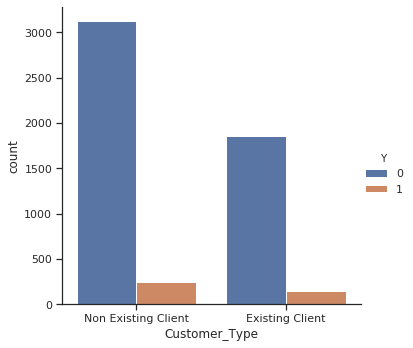

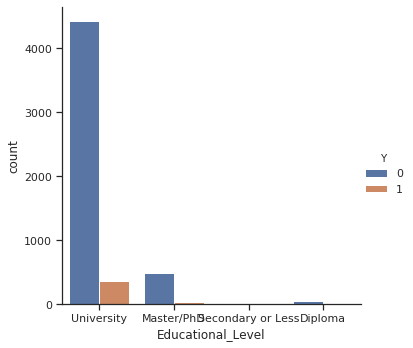

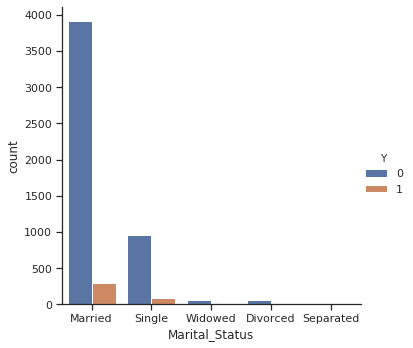

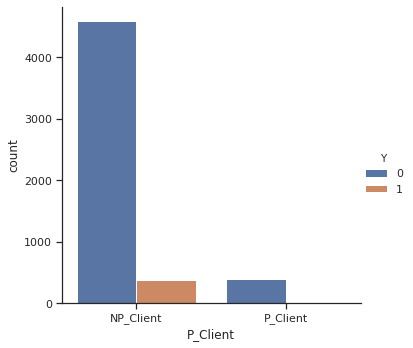

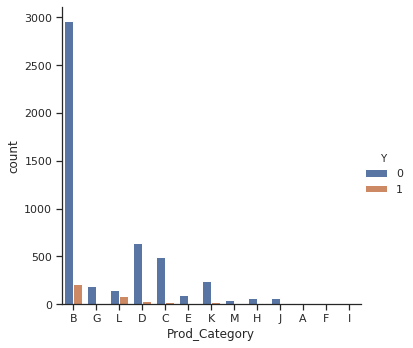

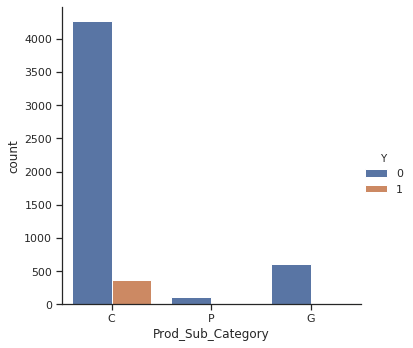

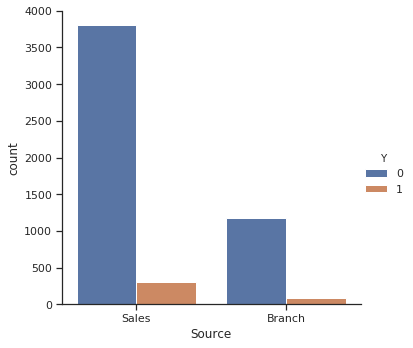

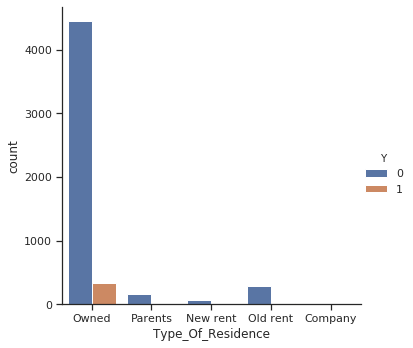

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

# sns.catplot(x="Customer_Type", hue="Y", kind="count", data=df)

for c in categorical_variables:
    print("\n\n--------")
    sns.catplot(x=c, hue="Y", kind="count", data=df)
    a = df.groupby([c,"Y"]).size()
    b = df.groupby(c).size()
    display(a)
    display(a.div(b, level=c) * 100)

In [46]:
a = df[categorical_variables + ["Y"]]
display(a)
display(a.corr(method ='pearson'))

,Customer_Type,Educational_Level,Marital_Status,P_Client,Prod_Category,Prod_Sub_Category,Source,Type_Of_Residence,Y
0,Non Existing Client,University,Married,NP_Client,B,C,Sales,Owned,0
1,Existing Client,University,Married,P_Client,G,C,Sales,Parents,0
2,Non Existing Client,University,Married,NP_Client,B,C,Sales,Owned,0
3,Existing Client,University,Married,NP_Client,L,C,Sales,New rent,1
4,Non Existing Client,University,Married,NP_Client,D,C,Sales,Owned,0
...,...,...,...,...,...,...,...,...,...
5375,Non Existing Client,University,Married,NP_Client,C,G,Sales,Owned,0
5376,Existing Client,University,Married,NP_Client,L,C,Sales,Owned,1
5377,Non Existing Client,University,Divorced,NP_Client,B,C,Branch,Old rent,0
5378,Non Existing Client,University,Married,NP_Client,C,G,Sales,Owned,0


,Y
Y,1.0


Algumas considerações que podemos tomar de acordo com os dados observados acima:

**Nenhuma correlação:**

- Customer_Type
- Marital_Status
- Source

**Possui algum correlação:**

- Educational_Level
  1. University
  2. Diploma/Master/PhD 
  3. Secondary/Less.
- P_Client
  1. NP_Client
  2. P_Client
- Prod_Category
  1. L
  2. H 
  3. A/B/C/D/K/M
  4. E/F/G/I/J
- Prod_Sub_Category
  1. C
  2. G
  3. P
- Type_Of_Residence
  1. New rent
  2. Old rent/Owned/Parents
  3. Company

In [76]:
from sklearn.preprocessing import OneHotEncoder
from copy import copy

display(df.head())
display(df[["P_Client"]].head())
one = OneHotEncoder(handle_unknown="ignore")
a = one.fit_transform(df[["P_Client"]]).toarray()
a = pd.DataFrame(a, columns=one.categories_)
display(a)
aux = copy(df)
aux = aux.drop("P_Client", axis=1)
aux = pd.concat([aux, a], axis=1)
display(aux)

,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,NP_Client,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B
1,573,0,Existing Client,13/06/1974,04/02/2009,P_Client,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,NP_Client,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B
3,3016,1,Existing Client,08/07/1982,25/08/2011,NP_Client,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,NP_Client,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D


,P_Client
0,NP_Client
1,P_Client
2,NP_Client
3,NP_Client
4,NP_Client


,NP_Client,P_Client
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
5375,1.0,0.0
5376,1.0,0.0
5377,1.0,0.0
5378,1.0,0.0


,Id_Customer,Y,Customer_Type,BirthDate,Customer_Open_Date,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category,"(NP_Client,)","(P_Client,)"
0,7440,0,Non Existing Client,07/08/1977,13/02/2012,University,Married,3.0,1,36,1.0,C,14/02/2012,Sales,Owned,1,NaN,B,1.0,0.0
1,573,0,Existing Client,13/06/1974,04/02/2009,University,Married,0.0,12,18,2.0,C,30/06/2011,Sales,Parents,1,NaN,G,0.0,1.0
2,9194,0,Non Existing Client,07/11/1973,03/04/2012,University,Married,2.0,10,36,1.0,C,04/04/2012,Sales,Owned,1,NaN,B,1.0,0.0
3,3016,1,Existing Client,08/07/1982,25/08/2011,University,Married,3.0,3,36,1.0,C,07/09/2011,Sales,New rent,1,31/12/2012,L,1.0,0.0
4,6524,0,Non Existing Client,18/08/1953,10/01/2012,University,Married,2.0,1,36,1.0,C,11/01/2012,Sales,Owned,1,NaN,D,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5389,0,Non Existing Client,09/04/1976,19/10/2011,University,Married,2.0,1,36,1.0,G,25/11/2011,Sales,Owned,1,NaN,C,1.0,0.0
5376,1358,1,Existing Client,27/05/1982,22/06/2011,University,Married,3.0,15,"24,816",1.0,C,11/07/2011,Sales,Owned,1,31/10/2012,L,1.0,0.0
5377,2502,0,Non Existing Client,19/10/1950,15/08/2011,University,Divorced,0.0,14,"14,4",30.0,C,16/08/2011,Branch,Old rent,1,31/03/2013,B,1.0,0.0
5378,6712,0,Non Existing Client,01/08/1983,15/01/2012,University,Married,1.0,1,36,1.0,G,19/01/2012,Sales,Owned,1,NaN,C,1.0,0.0


## Test Feature Engineering

In [5]:
class GetData:
    def __init__(self):
        self.data_path = os.path.join(os.path.dirname(os.getcwd()), "data", "CreditTraining.csv")
        self.df = pd.read_csv(self.data_path, decimal=',')

    """
    Method called by the user to get the data split and organized 
    
    Divide the database in train and test
    We will create a model with the train. 
    We will use the df_test at the final to see if the model works well
    """

    def get(self):
        df = self.df

        # Splitting the database
        X_train, X_test, y_train, y_test = train_test_split(df.drop("Y", axis=1), df["Y"], test_size=0.1,
                                                            random_state=7)
        df_train = pd.concat([y_train, X_train], axis=1).reset_index(drop=True)
        df_test = pd.concat([y_test, X_test], axis=1).reset_index(drop=True)

        return df_train, df_test

In [55]:
class FeatEng:
    def __init__(self):
        # self.selected_features = ["Y", "Customer_Type", "P_Client", "Educational_Level", "Marital_Status",
        #                          "Number_Of_Dependant", "Years_At_Residence", "Net_Annual_Income",
        #                          "Years_At_Business", "Source", "Type_Of_Residence", "Nb_Of_Products"]

        # Variables
        self.selected_features = ["Y", "Net_Annual_Income", "Years_At_Business",
                                  "Years_At_Residence", "Number_Of_Dependant"]
        self.categorical_features = ['Customer_Type', 'Educational_Level', 'Marital_Status',
                                     'P_Client', 'Prod_Category', 'Prod_Sub_Category',
                                     'Source', 'Type_Of_Residence']
        self.numerical_features = {'float64': ['Net_Annual_Income'],
                                   'int64': ['Number_Of_Dependant', 'Years_At_Residence',
                                             'Years_At_Business', 'Nb_Of_Products']}
        self.datetime_variables = ['BirthDate', 'Customer_Open_Date', 'Prod_Decision_Date', 'Prod_Closed_Date']

        # OneHotEncoder
        self.one_hot = False # We don't have yet the encoder
        self.encoders = 0


    def fit(self, df):
        # Fitting OneHotEncoder
        self.encoders = OneHotEncoder(handle_unknown='ignore')
        self.encoders.fit(df[self.categorical_features])
        self.one_hot = True

    def transform(self, df, one_hot=False):
#         if self.selected_features:
#             df = self.filter_variables(df)
#         print("(OK) Filter variable")
        
#         display(df.head())
#         print(df.shape)
        
        if self.categorical_features:
            df = self.convert_categorical(df)
        print("(OK) Categorical features")
        display(df.head())
        print(df.columns)
        
        print("\nTypes")
        print(df.dtypes)
        if self.numerical_features:
            df = self.cast_numerical(df)
        print("(OK) Numerical features")
        print(df.dtypes)
        display(df.head())

        # if one_hot:
        #     self.one_hot_encoding()
        # print("(OK) One hot")
        # display(df.head())

        y = np.array(df[['Y']]).reshape(-1, )
        X = np.array(df.drop(['Y'], axis=1))

        return X, y


    def filter_variables(self, df):
        return df[self.selected_features].fillna(0)


    def convert_categorical(self, df):
        # Use LabelEncoder from sklearn to convert the categorical variables into numerical
        if self.one_hot is False:
            raise Exception("There is no Label Encoder fitted.")
            
        aux = pd.DataFrame(self.encoders.transform(df[self.categorical_features]).toarray(), 
                           columns=self.encoders.get_feature_names(self.categorical_features))
        
        df = df.drop(self.categorical_features, axis=1)
        df = df.join(aux)

        return df


        # for column in self.categorical_features:
        #     if column in self.selected_features:
        #         # converting type of columns to 'category'
        #         self.df[column] = self.df[column].astype('category')
        #         # Assigning numerical values and storing in another column
        #         self.df[column] = self.df[column].cat.codes.astype('category')

    def cast_numerical(self, df):

        selected_numerical_float = list(set(self.numerical_features['float64']))
        selected_numerical_int = list(set(self.numerical_features['int64'])) + list(self.encoders.get_feature_names(self.categorical_features))
        # Float values
        df[selected_numerical_float] = df[selected_numerical_float].astype('float64')

        # Integer values
        df[selected_numerical_int] = df[selected_numerical_int].astype('Int64')
        
        return df

In [56]:
df_train, df_test = GetData().get()

print("df_train")
display(df_train.head())
print("df_test")
display(df_test.head())

fe = FeatEng()
fe.fit(df_train)
df_train_feat = fe.transform(df_train)

# Define features to be selected
fe.transform()
print(fe.df.dtypes)

df_train


,Y,Id_Customer,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,2246,Non Existing Client,17/05/1969,21/07/2011,NP_Client,University,Married,2.0,1,36.0,1.0,C,16/08/2011,Sales,Owned,1,NaN,B
1,0,5138,Existing Client,21/03/1976,08/05/2006,P_Client,University,Married,0.0,10,18.0,2.0,C,07/12/2011,Sales,Owned,1,NaN,B
2,0,1096,Non Existing Client,06/03/1964,02/06/2011,NP_Client,University,Married,3.0,10,18.0,1.0,C,28/06/2011,Sales,Owned,1,NaN,B
3,0,8413,Non Existing Client,27/01/1972,11/03/2012,NP_Client,University,Married,3.0,1,36.0,1.0,C,12/03/2012,Sales,Owned,1,NaN,D
4,0,3511,Non Existing Client,06/08/1961,26/09/2011,NP_Client,University,Married,0.0,1,36.0,1.0,C,27/09/2011,Sales,Owned,1,NaN,B


df_test


,Y,Id_Customer,Customer_Type,BirthDate,Customer_Open_Date,P_Client,Educational_Level,Marital_Status,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Sub_Category,Prod_Decision_Date,Source,Type_Of_Residence,Nb_Of_Products,Prod_Closed_Date,Prod_Category
0,0,6453,Existing Client,05/01/1964,10/01/2012,NP_Client,Master/PhD,Divorced,1.0,11,72.000,1.0,C,26/01/2012,Sales,Owned,1,NaN,C
1,0,7091,Existing Client,15/03/1985,03/03/2011,P_Client,University,Single,2.0,10,18.000,10.0,C,30/01/2012,Branch,Owned,1,NaN,G
2,0,710,Existing Client,10/02/1955,19/05/2011,NP_Client,University,Married,0.0,20,24.828,15.0,C,28/06/2011,Sales,Owned,1,NaN,L
3,0,5627,Non Existing Client,04/06/1976,07/12/2011,NP_Client,University,Married,2.0,5,25.000,1.0,C,11/12/2011,Sales,Owned,1,NaN,D
4,0,1307,Existing Client,28/05/1985,08/09/2010,P_Client,University,Single,0.0,15,21.288,1.0,C,12/07/2011,Sales,Owned,1,NaN,G


(OK) Categorical features


,Y,Id_Customer,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,Prod_Sub_Category_C,Prod_Sub_Category_G,Prod_Sub_Category_P,Source_Branch,Source_Sales,Type_Of_Residence_Company,Type_Of_Residence_New rent,Type_Of_Residence_Old rent,Type_Of_Residence_Owned,Type_Of_Residence_Parents
0,0,2246,17/05/1969,21/07/2011,2.0,1,36.0,1.0,16/08/2011,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,5138,21/03/1976,08/05/2006,0.0,10,18.0,2.0,07/12/2011,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0,1096,06/03/1964,02/06/2011,3.0,10,18.0,1.0,28/06/2011,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,8413,27/01/1972,11/03/2012,3.0,1,36.0,1.0,12/03/2012,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3511,06/08/1961,26/09/2011,0.0,1,36.0,1.0,27/09/2011,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Index(['Y', 'Id_Customer', 'BirthDate', 'Customer_Open_Date',
       'Number_Of_Dependant', 'Years_At_Residence', 'Net_Annual_Income',
       'Years_At_Business', 'Prod_Decision_Date', 'Nb_Of_Products',
       'Prod_Closed_Date', 'Customer_Type_Existing Client',
       'Customer_Type_Non Existing Client', 'Educational_Level_Diploma',
       'Educational_Level_Master/PhD', 'Educational_Level_Secondary or Less',
       'Educational_Level_University', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Separated',
       'Marital_Status_Single', 'Marital_Status_Widowed', 'P_Client_NP_Client',
       'P_Client_P_Client', 'Prod_Category_A', 'Prod_Category_B',
       'Prod_Category_C', 'Prod_Category_D', 'Prod_Category_E',
       'Prod_Category_F', 'Prod_Category_G', 'Prod_Category_H',
       'Prod_Category_I', 'Prod_Category_J', 'Prod_Category_K',
       'Prod_Category_L', 'Prod_Category_M', 'Prod_Sub_Category_C',
       'Prod_Sub_Category_G', 'Prod_Sub_Category_P', 

,Y,Id_Customer,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,Prod_Sub_Category_C,Prod_Sub_Category_G,Prod_Sub_Category_P,Source_Branch,Source_Sales,Type_Of_Residence_Company,Type_Of_Residence_New rent,Type_Of_Residence_Old rent,Type_Of_Residence_Owned,Type_Of_Residence_Parents
0,0,2246,17/05/1969,21/07/2011,2,1,36.0,1,16/08/2011,1,...,1,0,0,0,1,0,0,0,1,0
1,0,5138,21/03/1976,08/05/2006,0,10,18.0,2,07/12/2011,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1096,06/03/1964,02/06/2011,3,10,18.0,1,28/06/2011,1,...,1,0,0,0,1,0,0,0,1,0
3,0,8413,27/01/1972,11/03/2012,3,1,36.0,1,12/03/2012,1,...,1,0,0,0,1,0,0,0,1,0
4,0,3511,06/08/1961,26/09/2011,0,1,36.0,1,27/09/2011,1,...,1,0,0,0,1,0,0,0,1,0


(OK) One hot


,Y,Id_Customer,BirthDate,Customer_Open_Date,Number_Of_Dependant,Years_At_Residence,Net_Annual_Income,Years_At_Business,Prod_Decision_Date,Nb_Of_Products,...,Prod_Sub_Category_C,Prod_Sub_Category_G,Prod_Sub_Category_P,Source_Branch,Source_Sales,Type_Of_Residence_Company,Type_Of_Residence_New rent,Type_Of_Residence_Old rent,Type_Of_Residence_Owned,Type_Of_Residence_Parents
0,0,2246,17/05/1969,21/07/2011,2,1,36.0,1,16/08/2011,1,...,1,0,0,0,1,0,0,0,1,0
1,0,5138,21/03/1976,08/05/2006,0,10,18.0,2,07/12/2011,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1096,06/03/1964,02/06/2011,3,10,18.0,1,28/06/2011,1,...,1,0,0,0,1,0,0,0,1,0
3,0,8413,27/01/1972,11/03/2012,3,1,36.0,1,12/03/2012,1,...,1,0,0,0,1,0,0,0,1,0
4,0,3511,06/08/1961,26/09/2011,0,1,36.0,1,27/09/2011,1,...,1,0,0,0,1,0,0,0,1,0


NameError: name 'np' is not defined

In [9]:
import numpy as np
a = [[10,11],[12,13],[14,15]]
for i, b in enumerate(a):
    print(i, b)

0 [10, 11]
1 [12, 13]
2 [14, 15]


In [22]:
import datetime as dt
datetime_variables = ["BirthDate", 'Customer_Open_Date', 'Prod_Decision_Date', 'Prod_Closed_Date']
today = dt.datetime(2014, 1, 1)
for d in datetime_variables:
    print(d)
    aux = df[df[d].notnull()][d]
    aux = pd.to_datetime(aux)
    print(aux.min(), aux.max())
    print((today - aux.min()), (today - aux.max()), "\n")
    print((today - aux.min()).days/365, (today - aux.max()).days/365, "\n")

BirthDate
1937-06-12 00:00:00 1990-11-01 00:00:00
27962 days 00:00:00 8462 days 00:00:00 

76.6082191780822 23.183561643835617 

Customer_Open_Date
1982-04-03 00:00:00 2012-12-04 00:00:00
11596 days 00:00:00 393 days 00:00:00 

31.76986301369863 1.0767123287671232 

Prod_Decision_Date
2011-01-06 00:00:00 2012-12-04 00:00:00
1091 days 00:00:00 393 days 00:00:00 

2.989041095890411 1.0767123287671232 

Prod_Closed_Date
2011-10-31 00:00:00 2013-12-05 00:00:00
793 days 00:00:00 27 days 00:00:00 

2.1726027397260275 0.07397260273972603 



A partir de données ci-dessus, on va considérer que la date actuelle est 2014-01-01 00:00:00

In [20]:
today = dt.datetime(2014, 1, 1)
aux = df[["BirthDate"]]
aux["BirthDate"] = pd.to_datetime(aux["BirthDate"])
aux["age"] = aux["BirthDate"].apply(lambda x: (today - x).days//365 )
display(aux.head())
display(aux.describe())

# aux = df[["Customer_Open_Date"]]
# aux["Customer_Open_Date"] = pd.to_datetime(aux["Customer_Open_Date"])
# aux["age_customer"] = aux["Customer_Open_Date"].apply(lambda x: (today - x).days//30 )
# display(aux.head())
# display(aux.describe())

# aux = df[["Prod_Decision_Date"]]
# aux["Prod_Decision_Date"] = pd.to_datetime(aux["Prod_Decision_Date"])
# aux["age_decision"] = aux["Prod_Decision_Date"].apply(lambda x: (today - x).days//30 )
# display(aux.head())
# display(aux.describe())

# aux = df[["Prod_Closed_Date"]]
# aux["Prod_Closed_Date"] = pd.to_datetime(aux["Prod_Closed_Date"])
# aux["exist_closed"] = aux["Prod_Closed_Date"].notnull() * 1
# aux["age_closed"] = aux["Prod_Closed_Date"].apply(lambda x: (today - x).days//30 )
# display(aux.head())
# display(aux.describe())

/home/matheus/Programas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matheus/Programas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BirthDate,age
0,1977-07-08,36
1,1974-06-13,39
2,1973-07-11,40
3,1982-08-07,31
4,1953-08-18,60


,age
count,5380.000000
mean,41.331413
std,10.967766
min,23.000000
25%,32.000000
50%,40.000000
75%,50.000000
max,76.000000


In [50]:
a = df["Years_At_Business"].mode()
display(a)

0    1.0
dtype: float64